In [20]:
from PIL import Image
import numpy as np
import pandas as pd
import requests
from io import BytesIO
from torchvision import transforms as T

In [3]:
raw_male_data = pd.read_csv("./dataset/male_players_22.csv")
raw_female_data = pd.read_csv("./dataset/female_players_22.csv")

C:\Users\YSH\AppData\Local\Temp\ipykernel_9512\3388239480.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_male_data = pd.read_csv("./dataset/male_players_22.csv")


In [4]:
raw_male_data.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [8]:
columns = raw_male_data.columns
columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [10]:
male_data = raw_male_data.loc[:, ["sofifa_id", "short_name", "player_face_url"]]

In [11]:
male_data.head()

,sofifa_id,short_name,player_face_url
0,158023,L. Messi,https://cdn.sofifa.net/players/158/023/22_120.png
1,188545,R. Lewandowski,https://cdn.sofifa.net/players/188/545/22_120.png
2,20801,Cristiano Ronaldo,https://cdn.sofifa.net/players/020/801/22_120.png
3,190871,Neymar Jr,https://cdn.sofifa.net/players/190/871/22_120.png
4,192985,K. De Bruyne,https://cdn.sofifa.net/players/192/985/22_120.png


In [12]:
female_data = raw_female_data.loc[:, ["sofifa_id", "short_name", "player_face_url"]]

In [30]:
test_face_url = male_data.player_face_url[0]
response = requests.get(test_face_url)
img = Image.open(BytesIO(response.content)).convert("RGB")

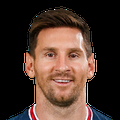

In [31]:
img

In [37]:
transform = T.Compose([
     T.ToTensor(),
     T.Resize((224, 224))
])
transformed_img = transform(img)

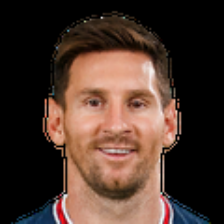

In [38]:
to_pil_image = T.ToPILImage()
to_pil_image(transformed_img)

In [42]:
from torchvision import models

model = models.resnet34(pretrained=True)

c:\Users\YSH\anaconda3\envs\mlenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\YSH\anaconda3\envs\mlenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [47]:
unsqueezed_img = transformed_img.unsqueeze(0)
model(unsqueezed_img).shape

torch.Size([1, 1000])

In [48]:
male_data.to_csv("train_male.csv")
female_data.to_csv("train_female.csv")

In [49]:
len(male_data)

19239

In [63]:
label = pd.read_csv("./tmp/embedding_idx.csv")
import pickle
with open("./tmp/label", "wb") as fp:
    pickle.dump(label["index"].tolist(), fp)

In [64]:
with open("./tmp/label", "rb" ) as fp:
    b = pickle.load(fp)

In [65]:
b

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [66]:
embedding_array = np.load("./tmp/embedding.npy")

In [68]:
embedding_array.shape

(439, 512, 1, 1)

In [71]:
embeddings = [np.sum((emb-embedding_array[0])**2) for emb in embedding_array]

In [74]:
np.argmin(embeddings)

0

In [1]:
import inference
from PIL import Image

name, url = inference.inference(Image.open("./test/test_img.JPG").convert("RGB"))

c:\Users\YSH\anaconda3\envs\mlenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\YSH\anaconda3\envs\mlenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


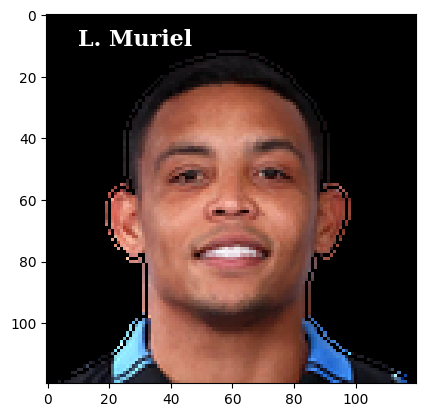

In [9]:
import utils
import matplotlib.pyplot as plt
%matplotlib inline

font1 = {'family': 'serif',
      'color':  'white',
      'weight': 'bold',
      'size': 16}

image = utils.load_image_with_url(url)
plt.text(10, 10, name, font1)
plt.imshow(image)
plt.show()

In [ ]:
import winsound

winsound.Beep(2093, 180)

In [10]:
inference.inference(Image.open("./test/test_img2.JPG").convert("RGB"))

('M. Pjanić', 'https://cdn.sofifa.net/players/180/206/22_120.png')

In [4]:
import glob 
import pandas as pd
from PIL import Image

In [6]:
dataset = glob.glob("./dataset/afhq/train/cat/*.jpg") + glob.glob("./dataset/afhq/train/dog/*.jpg") + glob.glob('./dataset/afhq/train/cat/*.jpg') 

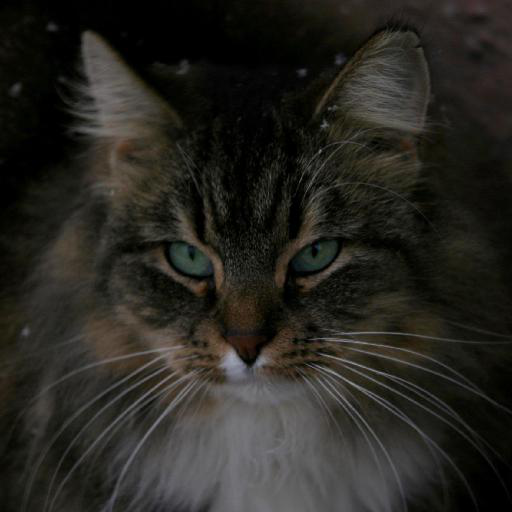

In [5]:
Image.open(dataset[0])

In [7]:
len(dataset)

15045

In [8]:
pd.DataFrame(dataset, columns=["url"]).to_csv("./dataset/animal.csv")